## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Linear convection without CFL

In [22]:
def linearconv_withoutCFL(u, nx, nt, dx):
    dt = .025  
    c = 1.
    
    #fill the update of u
    un = np.empty(nx)
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - c * (dt/dx) * (un[i] - un[i-1])
    return 0

## Linear convection with CFL

In [28]:
def linearconv_withCFL(u, nx, nt, dx):
    c = 1.
    CFL = 0.5
    dt = CFL*dx/np.fabs(c) 
    
    #fill the update of u
    un = np.empty(nx)
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - c * (dt/ dx) * (un[i] - un[i-1])
    
    return 0

## Inputs

---------- nx = 41 ---------


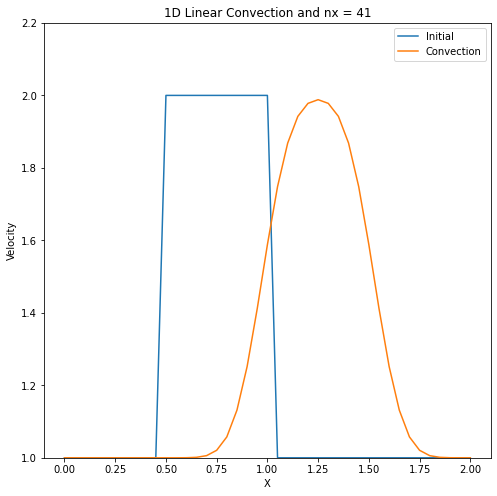

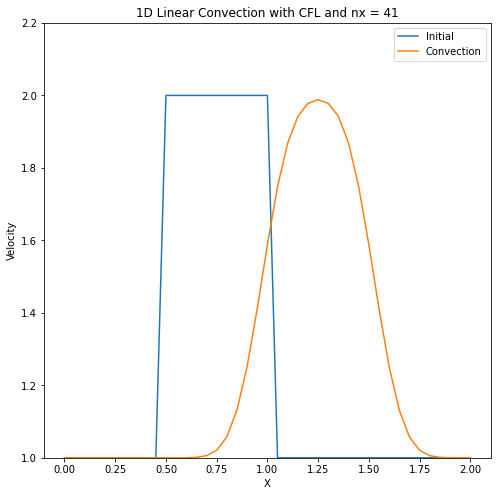



---------- nx = 81 ---------


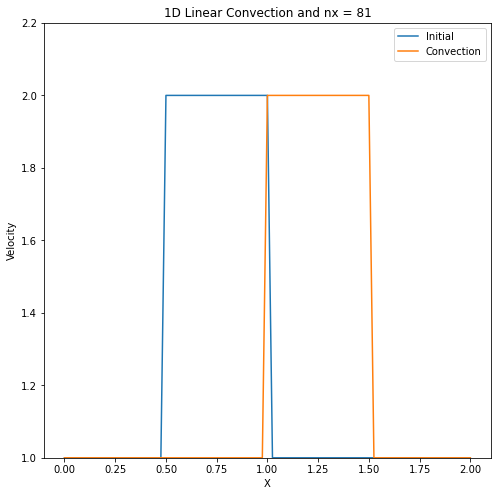

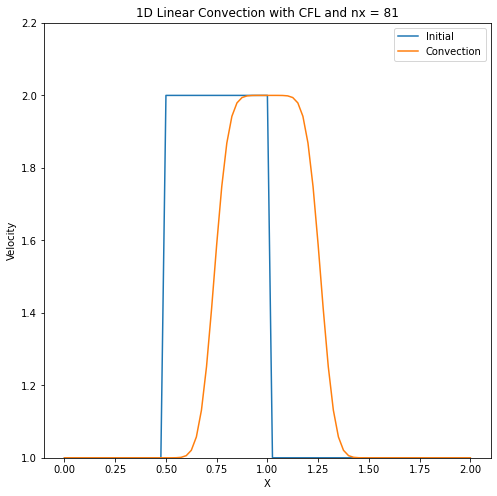



---------- nx = 83 ---------


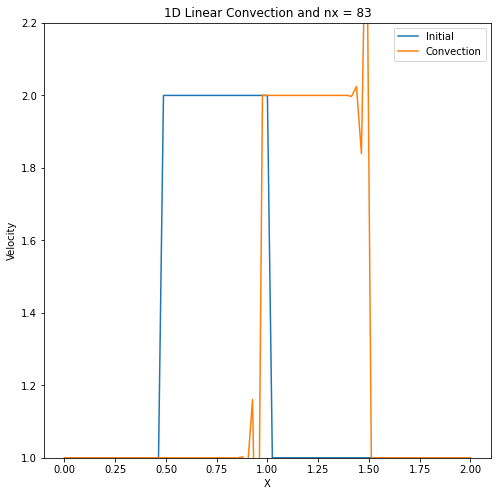

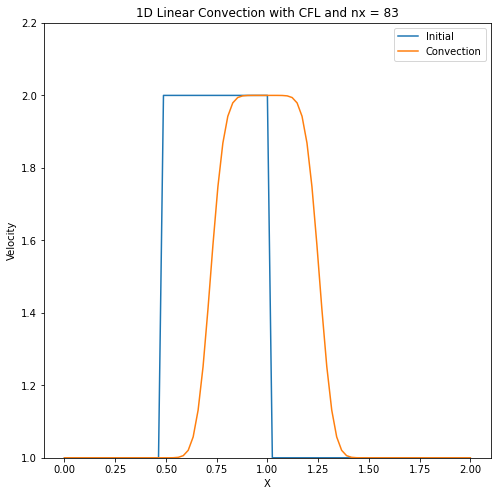



---------- nx = 85 ---------


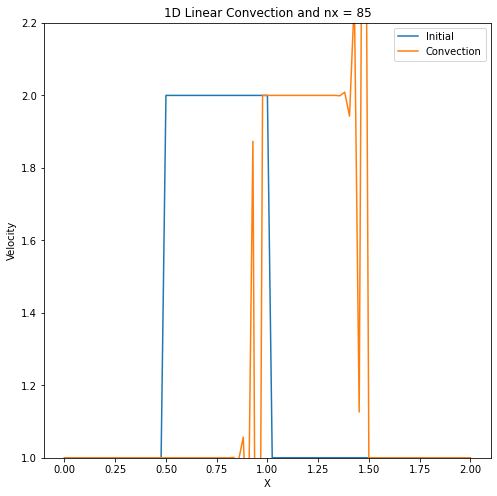

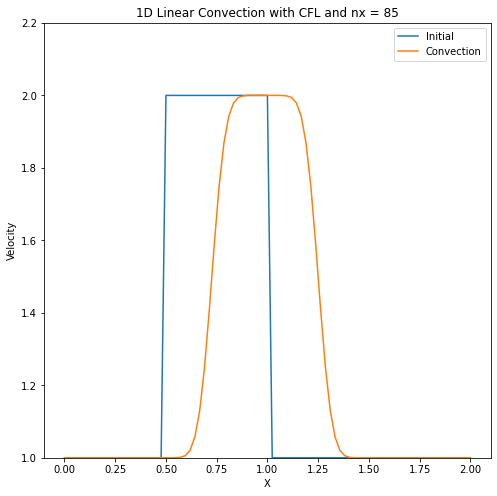



---------- nx = 91 ---------


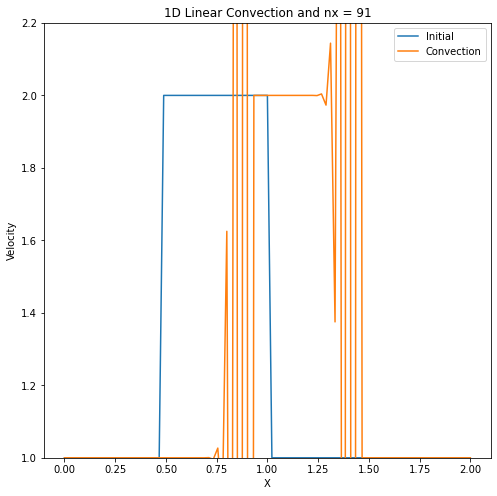

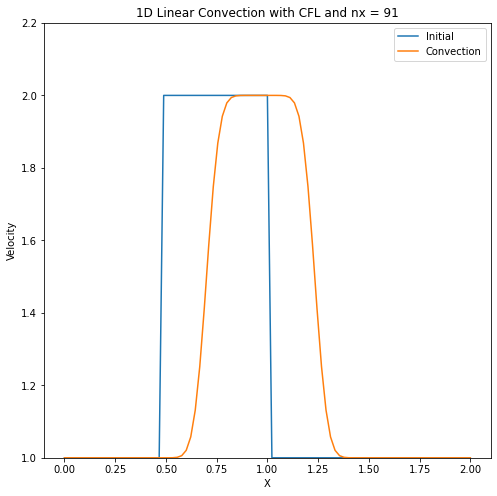



---------- nx = 100 ---------


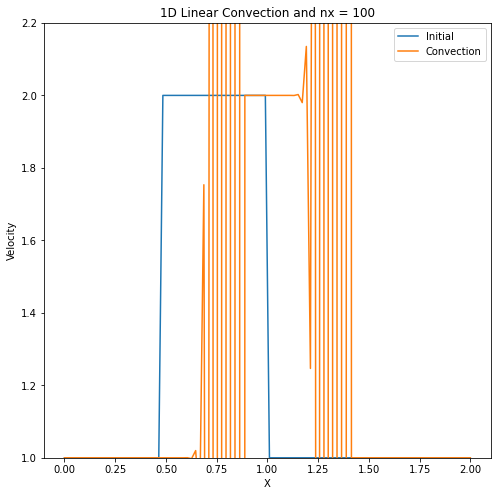

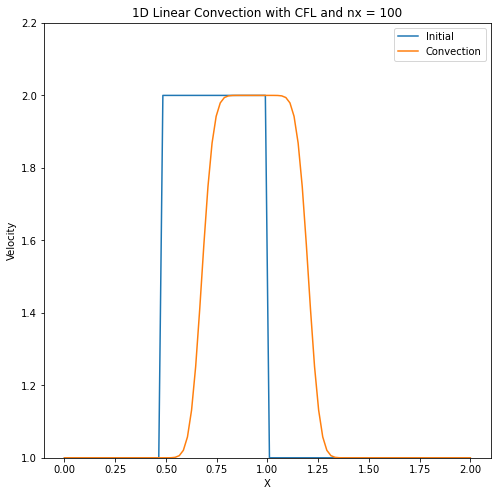

In [46]:
N = [41, 81, 83, 85, 91, 100] 
for i, nx in enumerate(N):
    
    print("---------- nx = {} ---------".format(nx))
    dx = 2 / (nx - 1)
    nt = 20

    grid = np.linspace(0,2,nx) 
    u0 = np.ones(nx)      
    u0[int(.5/dx):int(1/ dx + 1)] = 2.0
    
    
    # Function without CFL
    u = u0.copy()
    linearconv_withoutCFL(u, nx, nt, dx)

    plt.figure(figsize=(8, 8))
    plt.plot(grid,u0, label="Initial")
    plt.plot(grid,u, label="Convection")
    plt.ylim([1.,2.2])
    plt.xlabel('X')
    plt.ylabel('Velocity')    
    plt.title('1D Linear Convection and nx = {}'.format(nx))
    plt.legend()
    plt.show()
    
    # Function with CFL
    u = u0.copy()
    linearconv_withCFL(u, nx, nt, dx)

    plt.figure(figsize=(8, 8))
    plt.plot(grid,u0, label="Initial")
    plt.plot(grid,u, label="Convection")
    plt.ylim([1.,2.2])
    plt.xlabel('X')
    plt.ylabel('Velocity')    
    plt.title('1D Linear Convection with CFL and nx = {}'.format(nx))
    plt.legend()
    plt.show()
    
    if i != len(N)-1:
        print("\n")

**Plus la valeur de nx augmente plus la convection sans CFL devient installe et commence à osciller alors que celle avec reste stable. <br/>
<u>Conclusion </u>: CFL joue un rôle très important dans la stabilité de la convexion dépendant de la discrétisation.**

**<center>Thank you !</center>**